In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Load Dataset
df=pd.read_csv('insurance2.csv')

In [4]:
#Doing basic operations
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.shape

(1338, 8)

In [6]:
df.size

10704

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1337, 8)

In [13]:
df.duplicated().sum()

np.int64(0)

# Corelations:

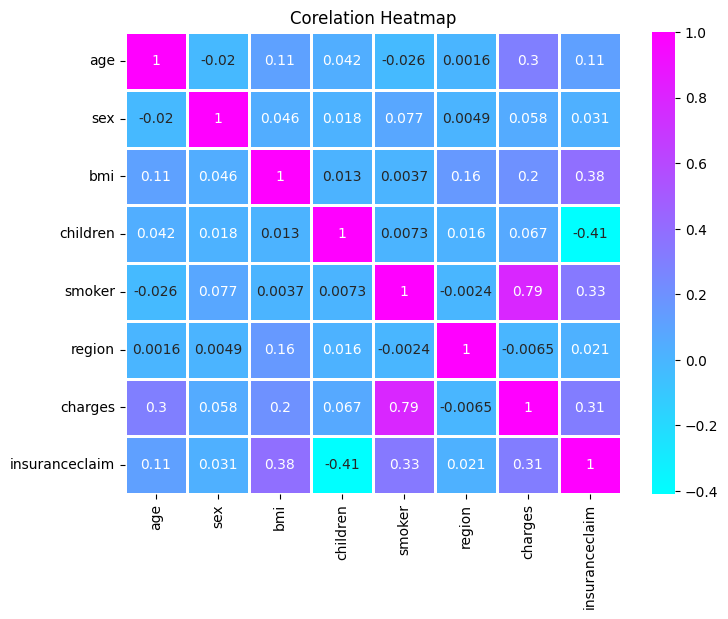

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='cool',linewidth=2.0)
plt.title('Corelation Heatmap')
plt.show()

# Obsevations:

1.children and claim are negatively corelated.

2.BMI is Corelated with Claim

3.No much corelation can be seen between features themseleves so no need to remove any features.

4.Smoker,BMI,charges are corelated maximum with target i.e. Insurance Claim.

# Check for Outliers

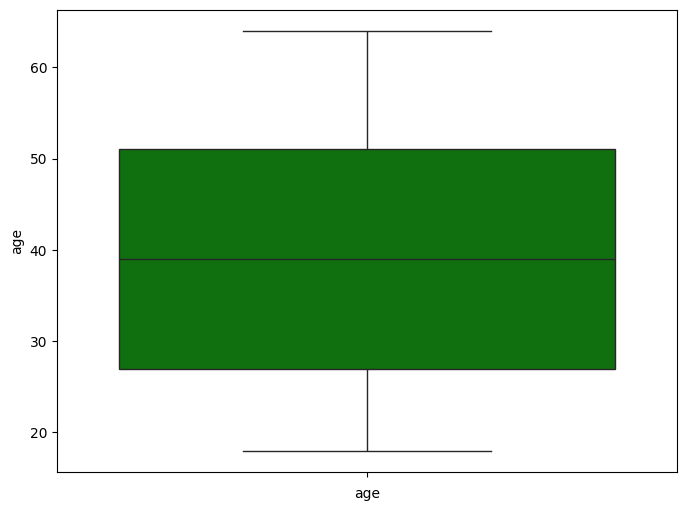

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(df['age'],color='green')
plt.xlabel('age')
plt.show()

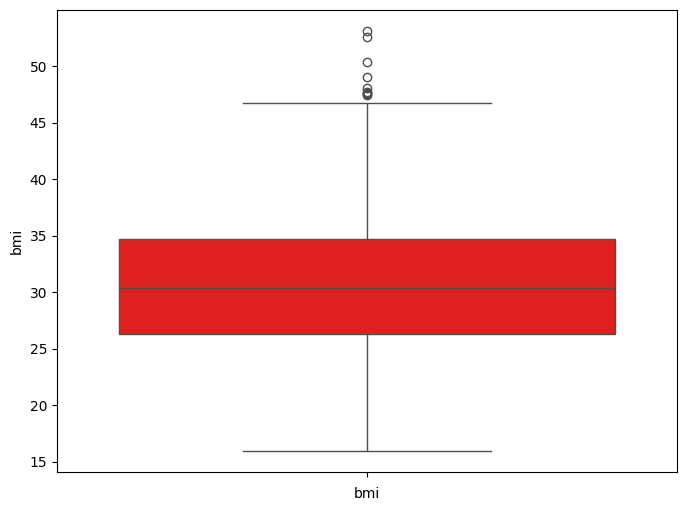

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(df['bmi'],color='red')
plt.xlabel('bmi')
plt.show()

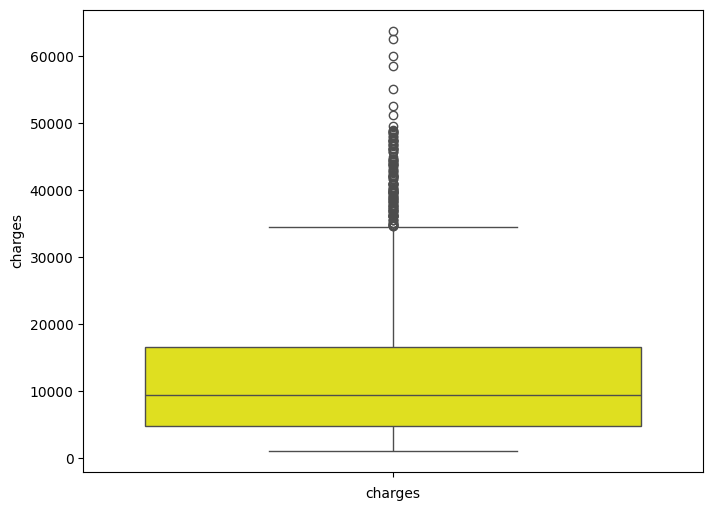

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(df['charges'],color='yellow')
plt.xlabel('charges')
plt.show()

# Observations:

1.There are outliers in bmi and charges.

But we are not going to drop outliers as there is corelation between these features and target and data is also very less to predict  or make the correct model

# Scaling:

In [25]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=df.drop(['insuranceclaim'],axis=1)
df_scaled1=scaler.fit_transform(df_scaled)
df_scaled=pd.DataFrame(df_scaled1,columns=df_scaled.columns)
df_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,-1.009771,-0.453160,-0.909234,1.969660,1.343163,0.297857
1,-1.511647,0.990324,0.509422,-0.079442,-0.507702,0.438017,-0.954381
2,-0.799350,0.990324,0.383155,1.580143,-0.507702,0.438017,-0.729373
3,-0.443201,0.990324,-1.305052,-0.909234,-0.507702,-0.467128,0.719104
4,-0.514431,0.990324,-0.292456,-0.909234,-0.507702,-0.467128,-0.777499


# Next ,we will select the best model for our problem by evaluating various models on the dataset and selecting the one with the highest performance.

In [ ]:
#Dividing the data into training and test
x=df_scaled
y=df['insuranceclaim']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (1069, 7)
x_test (268, 7)
y_train (1069,)
y_test (268,)


# 1.Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
#Accuracy on training 
print("Accuracy on training :",lr.score(x_train,y_train))
print("Accuracy on testing :",lr.score(x_test,y_test))

Accuracy on training : 0.8840037418147801
Accuracy on testing : 0.8955223880597015


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve

# 2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
#Accuracy on training set 
print("Accuracy on training :",dt.score(x_train,y_train))
#Accuracy on testing set 
print("Accuracy on testing :",dt.score(x_test,y_test))

Accuracy on training : 1.0
Accuracy on testing : 0.9850746268656716


# 3.Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier()
rt.fit(x_train,y_train)

#Accuracy on training set 
print("Accuracy on training :",rt.score(x_train,y_train))
#Accuracy on testing set 
print("Accuracy on testing :",rt.score(x_test,y_test))

Accuracy on training : 1.0
Accuracy on testing : 0.9552238805970149


In [41]:
y_pred=lr.predict(x_test)
print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Recall_score:  ",recall_score(y_test,y_pred))
print("Precision_score:",precision_score(y_test,y_pred))
print("f1_score:  ",f1_score(y_test,y_pred))

confusion matrix :
 [[102  17]
 [ 11 138]]


Accuracy_score: 0.8955223880597015
Recall_score:   0.9261744966442953
Precision_score: 0.8903225806451613
f1_score:   0.9078947368421053


In [42]:
y_pred=dt.predict(x_test)
print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Recall_score:  ",recall_score(y_test,y_pred))
print("Precision_score:",precision_score(y_test,y_pred))
print("f1_score:  ",f1_score(y_test,y_pred))

confusion matrix :
 [[119   0]
 [  4 145]]


Accuracy_score: 0.9850746268656716
Recall_score:   0.9731543624161074
Precision_score: 1.0
f1_score:   0.9863945578231292
